In [1]:
from openparse import DocumentParser, Pdf
from pprint import pprint
import re
import os

ELEMENT_DELIMETER = "<br><br>"
NEWLINE = "  \n"
DOUBLE_NEWLINE = "\n\n"

pdf_path = "../docs/abc.pdf"


parser = DocumentParser(
    table_args={
        "parsing_algorithm": "pymupdf",
        "table_output_format": "markdown",
    },
)

parsed_pdf = parser.parse(pdf_path)
pprint(parsed_pdf)

ParsedDocument(id_='8f6d7f6c-cee8-4914-94db-96b734b44b60', nodes=[Node(id_='848d99db-c6e1-46d6-a50b-73258f75f31f', elements=(TextElement(text='独创性声明\n本人声明所呈交的学位论文是我个人在导师的指导下进行的研究', lines=(LineElement(bbox=(250.44, 721.69, 360.47, 743.64), spans=(TextSpan(text='独创性声明', is_bold=False, is_italic=False, size=21.95),), style=None, text='独创性声明'), LineElement(bbox=(113.04, 699.79, 505.08, 713.84), spans=(TextSpan(text='本人声明所呈交的学位论文是我个人在导师的指导下进行的研究', is_bold=False, is_italic=False, size=14.05),), style=None, text='本人声明所呈交的学位论文是我个人在导师的指导下进行的研究')), bbox=Bbox(page=2, page_height=841.9, page_width=595.3, x0=113.04, y0=699.79, x1=505.08, y1=743.64), variant=<NodeVariant.TEXT: 'text'>, embed_text='独创性声明\n本人声明所呈交的学位论文是我个人在导师的指导下进行的研究'), TextElement(text='工作及取得的研究成果。尽我所知，除文中已标明引用的内容外，本', lines=(LineElement(bbox=(85.08, 668.59, 505.2, 682.64), spans=(TextSpan(text='工作及取得的研究成果。尽我所知，除文中已标明引用的内容外，本', is_bold=False, is_italic=False, size=14.05),), style=None, text='工作及取得的研究成果。尽我所知，除文中已标明引用的内容外，本'),), bbox=

In [2]:
pdf_dict = parsed_pdf.model_dump()
pprint(pdf_dict)

{'coordinate_system': 'bottom-left',
 'creation_date': datetime.date(2024, 5, 22),
 'file_size': 2174743,
 'filename': 'abc.pdf',
 'last_accessed_date': datetime.date(2024, 5, 22),
 'last_modified_date': datetime.date(2024, 5, 22),
 'nodes': [{'bbox': [{'page': 2,
                      'page_height': 841.9,
                      'page_width': 595.3,
                      'x0': 85.08,
                      'x1': 505.2,
                      'y0': 574.99,
                      'y1': 743.64}],
            'embedding': None,
            'node_id': '848d99db-c6e1-46d6-a50b-73258f75f31f',
            'text': '独创性声明\n'
                    '本人声明所呈交的学位论文是我个人在导师的指导下进行的研究<br><br>工作及取得的研究成果。尽我所知，除文中已标明引用的内容外，本<br><br>论文不包含任何其他人或集体已经发表或撰写过的研究成果。对本文<br><br>的研究做出贡献的个人和集体，均已在文中以明确方式标明。本人完<br><br>全意识到本声明的法律结果由本人承担。',
            'tokens': 162,
            'variant': {'text'}},
           {'bbox': [{'page': 2,
                      'page_height': 841.9,
                      'page_width': 595.3,
       

In [3]:
def remove_spaces_and_newlines(text: str) -> str:
    # 使用正则表达式去掉汉字与汉字之间的空格和换行符
    text = re.sub(r"(?<=[\u4e00-\u9fff])\s+(?=[\u4e00-\u9fff])", "", text)
    # 使用正则表达式去掉英文与英文之间的空格和换行符
    text = re.sub(r"(?<=[a-zA-Z])\s+(?=[a-zA-Z])", "", text)
    # 使用正则表达式去掉汉字与英文之间的空格和换行符
    text = re.sub(r"(?<=[\u4e00-\u9fff])\s+(?=[a-zA-Z])", "", text)
    # 使用正则表达式去掉英文与汉字之间的空格和换行符
    text = re.sub(r"(?<=[a-zA-Z])\s+(?=[\u4e00-\u9fff])", "", text)
    return text

In [4]:
def write_text_to_markdown(data, output_file):
    formatted_text = ""
    for item in data:
        text = item["text"]
        if "table" in item["variant"]:
            text = remove_spaces_and_newlines(text)
        formatted_text = (
            formatted_text
            + DOUBLE_NEWLINE
            + text.replace("\n", NEWLINE).replace(ELEMENT_DELIMETER, NEWLINE)
        )
    with open(output_file, "w", encoding="utf-8") as f:
        f.write(formatted_text)


output_file = "output_markdown/document.md"
os.makedirs(os.path.dirname(output_file), exist_ok=True)
write_text_to_markdown(pdf_dict["nodes"], output_file)

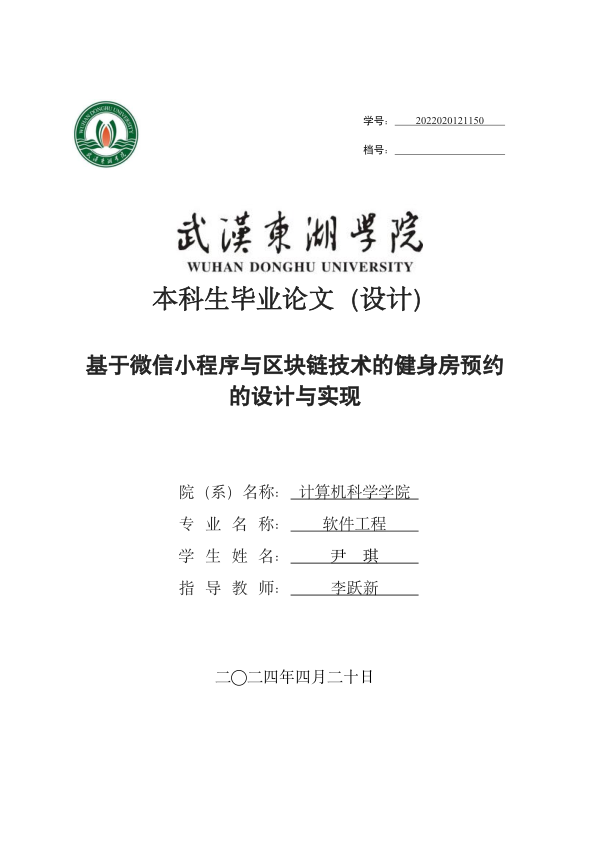

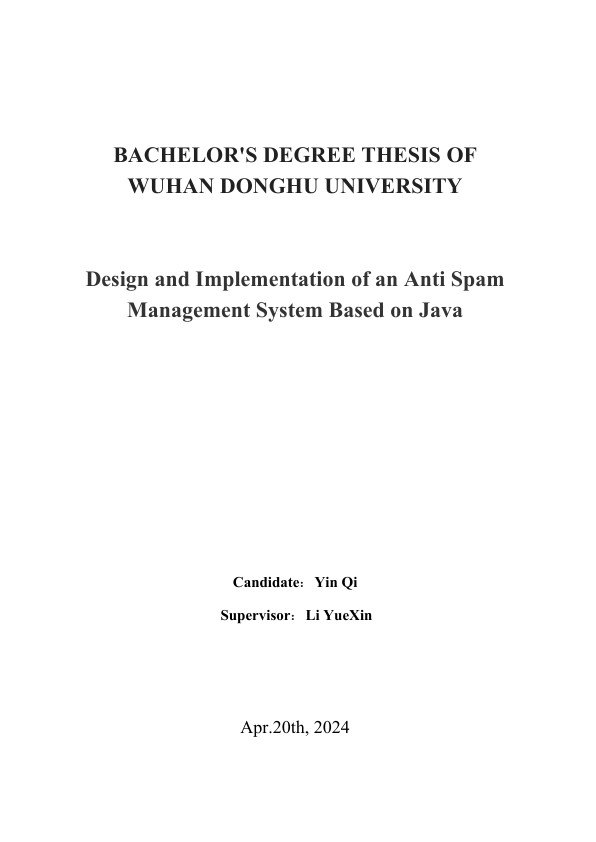

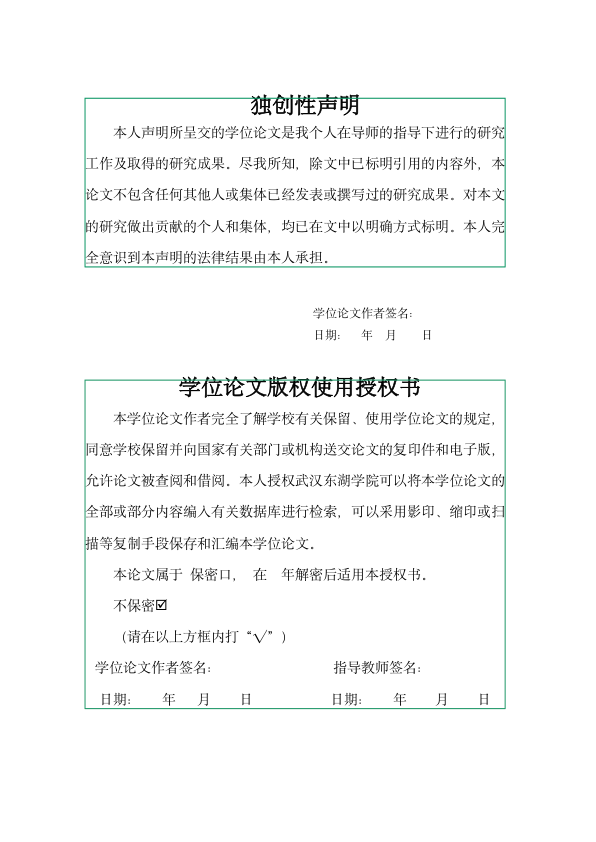

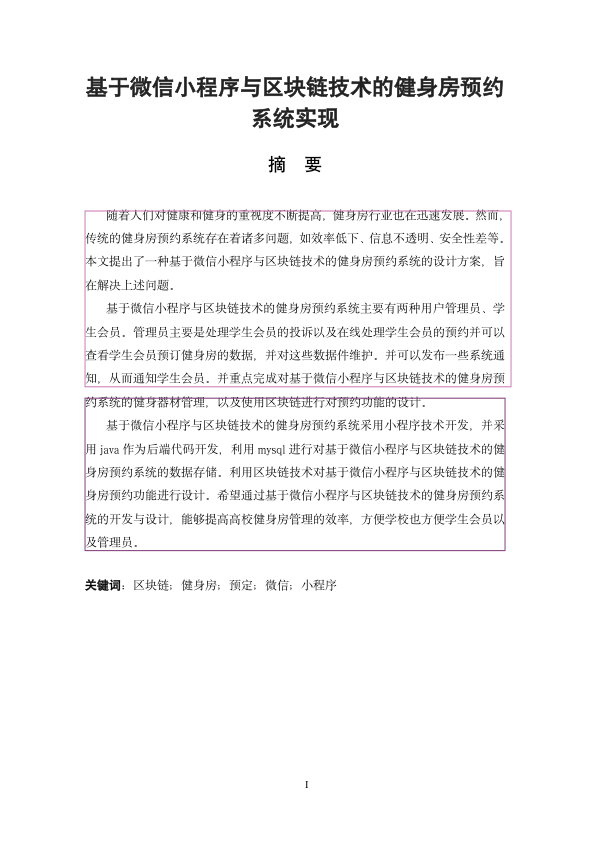

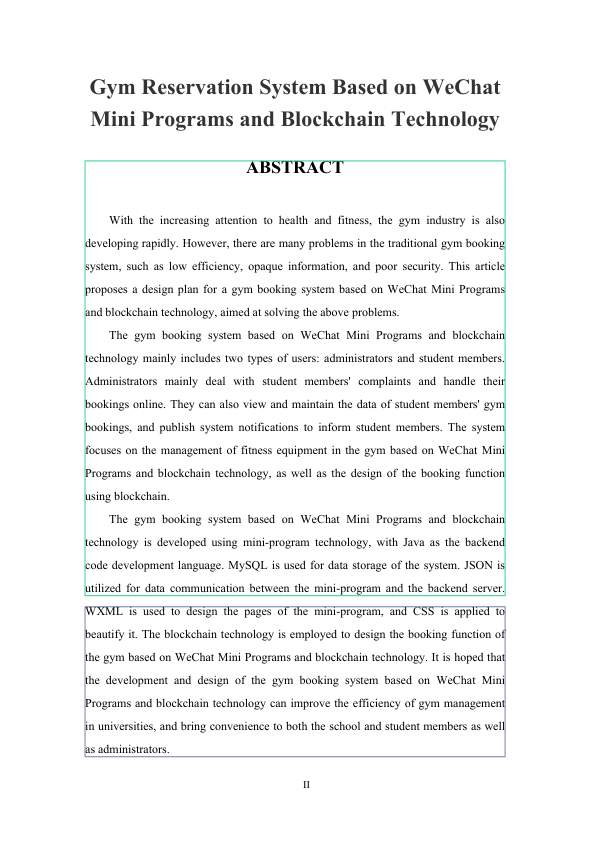

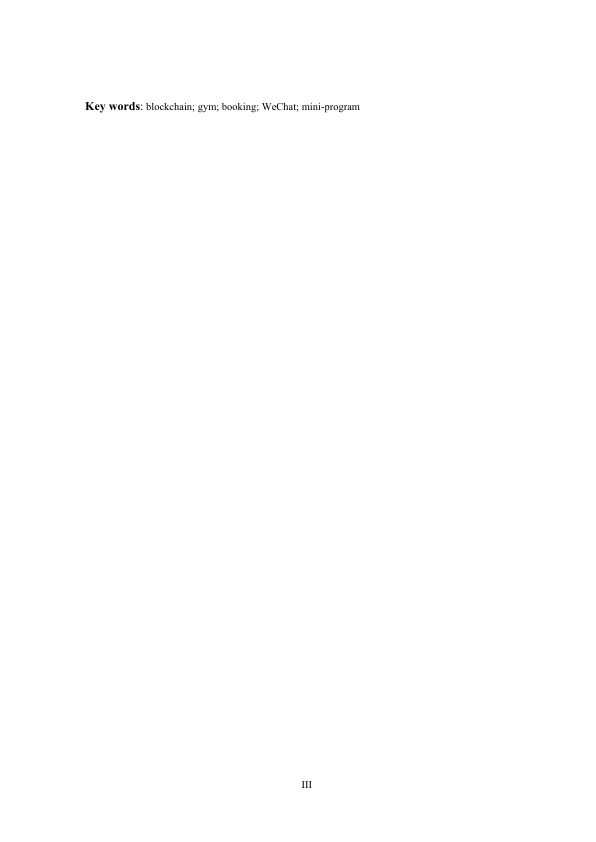

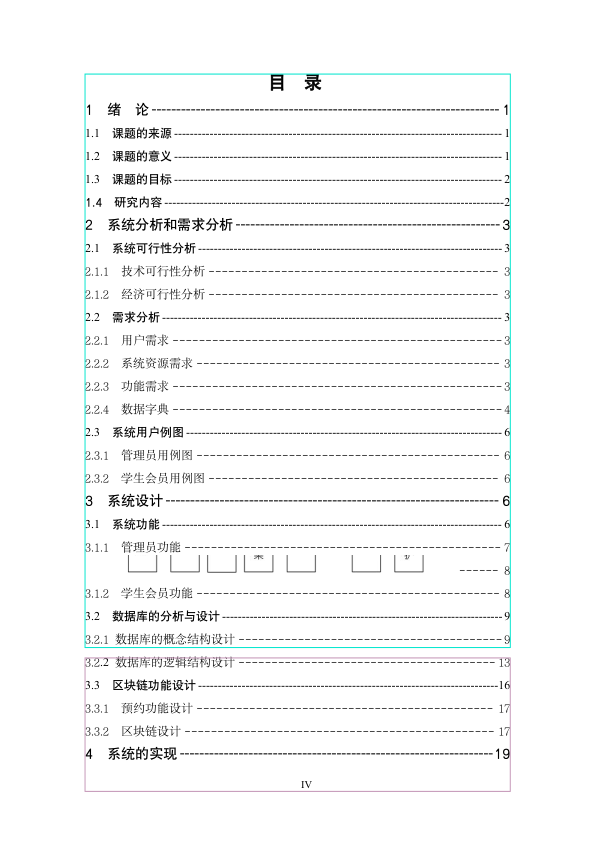

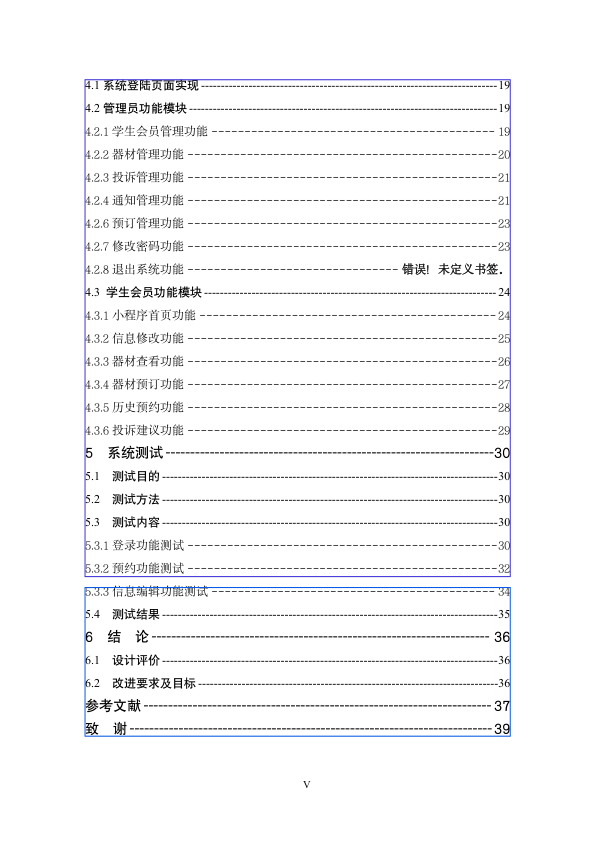

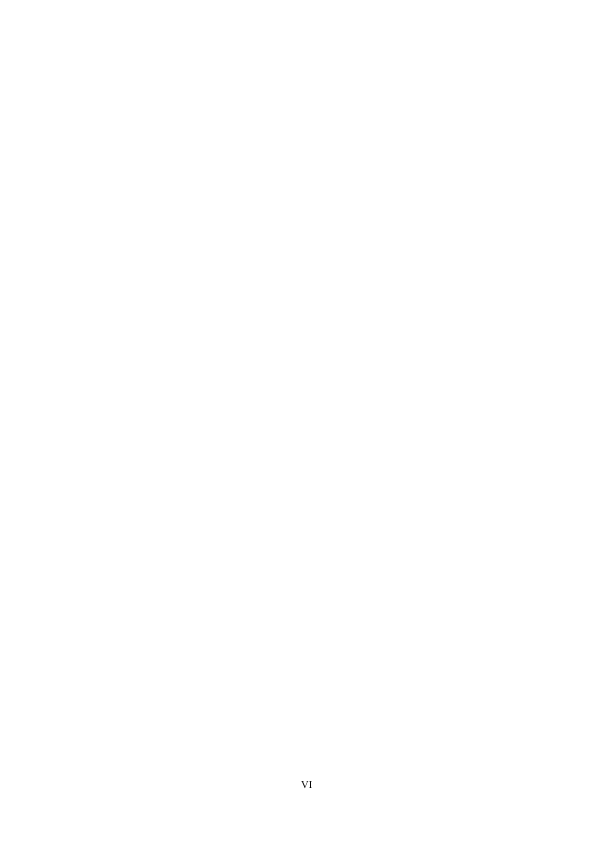

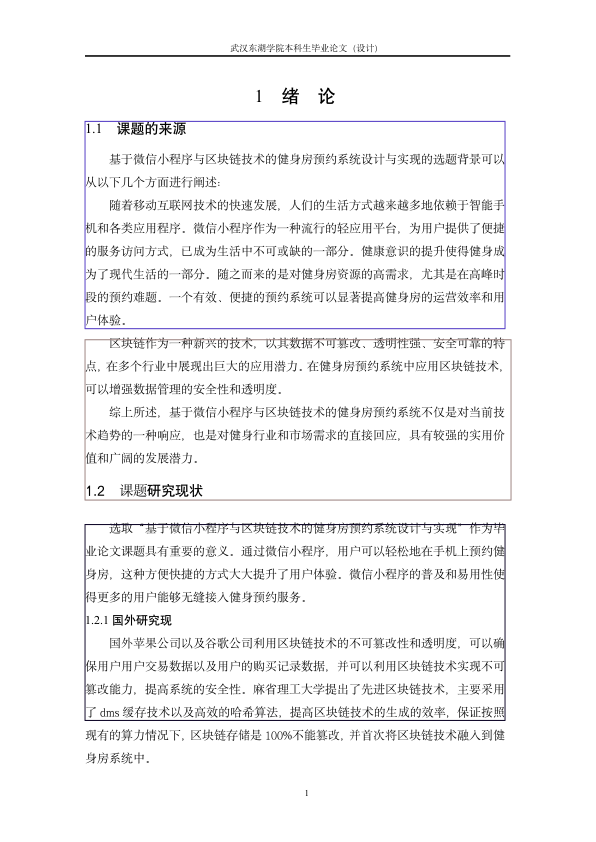

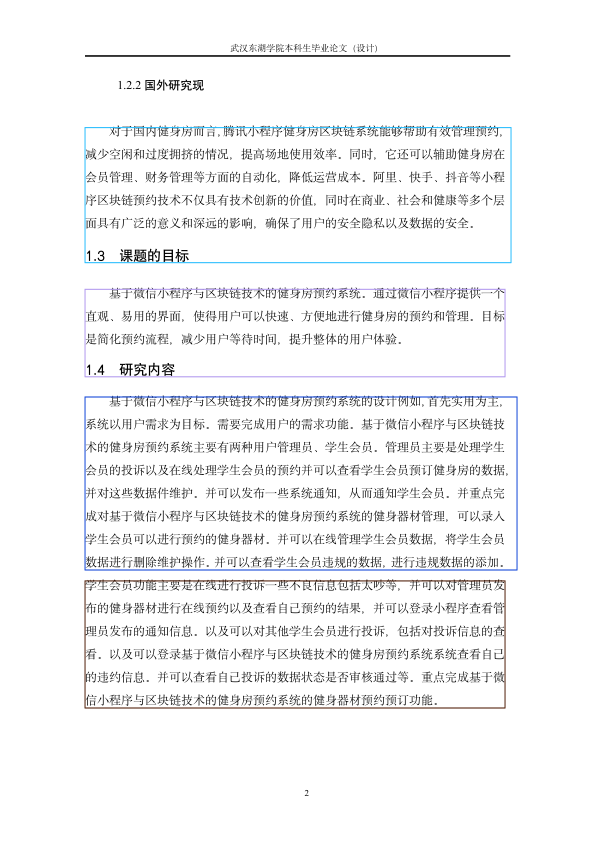

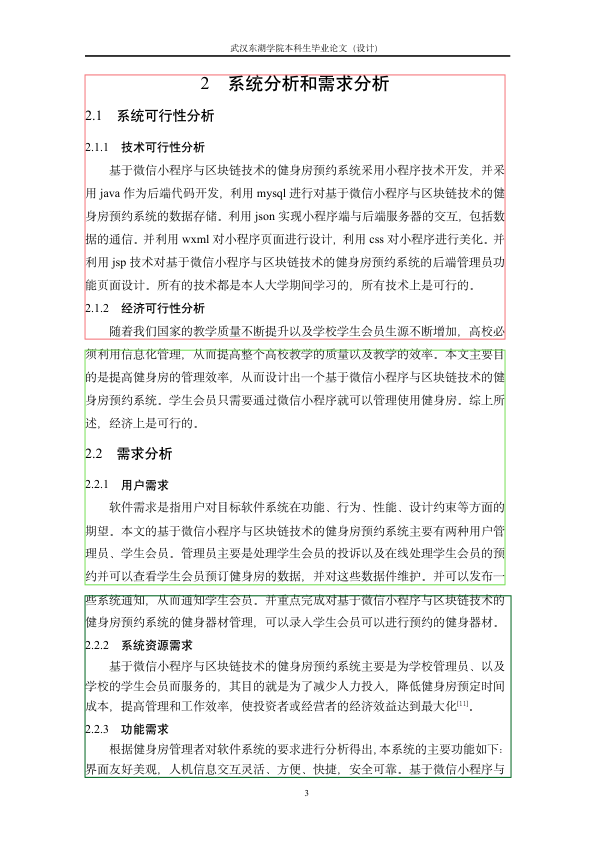

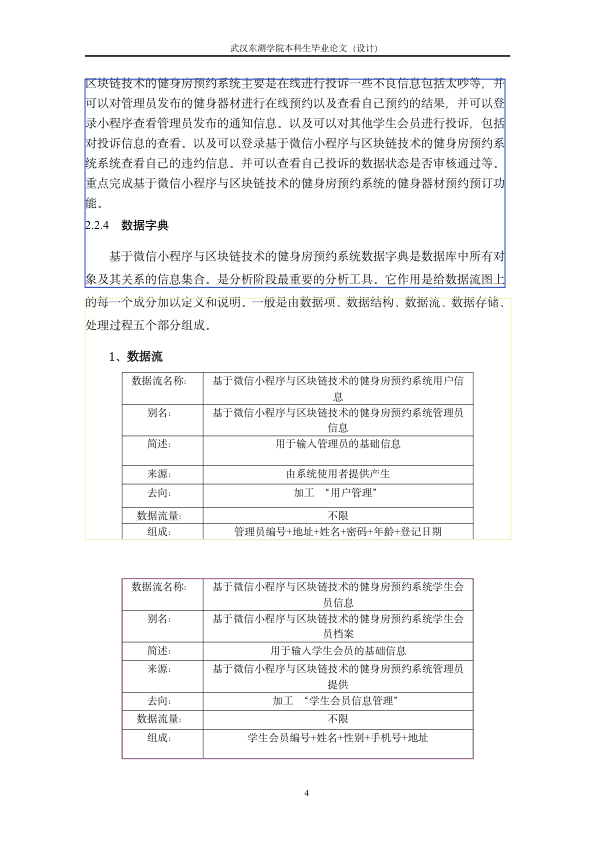

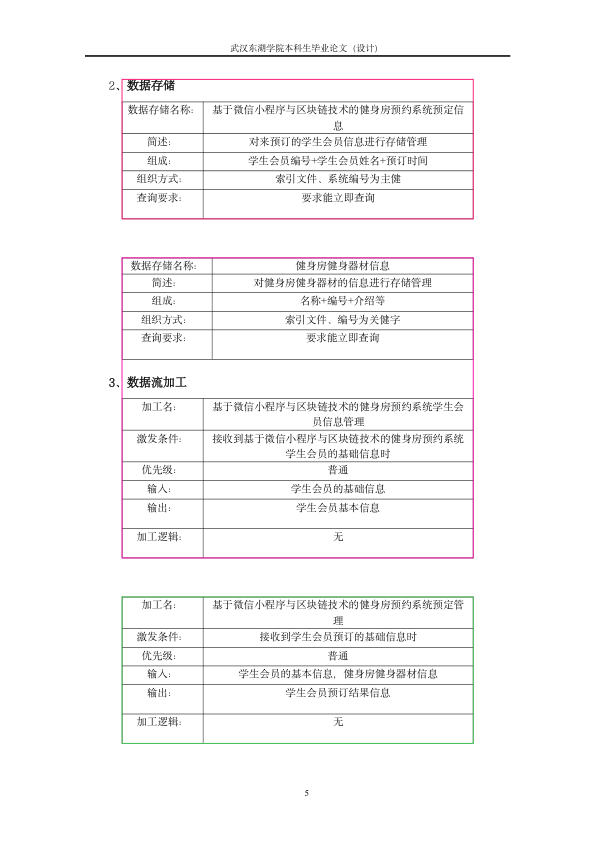

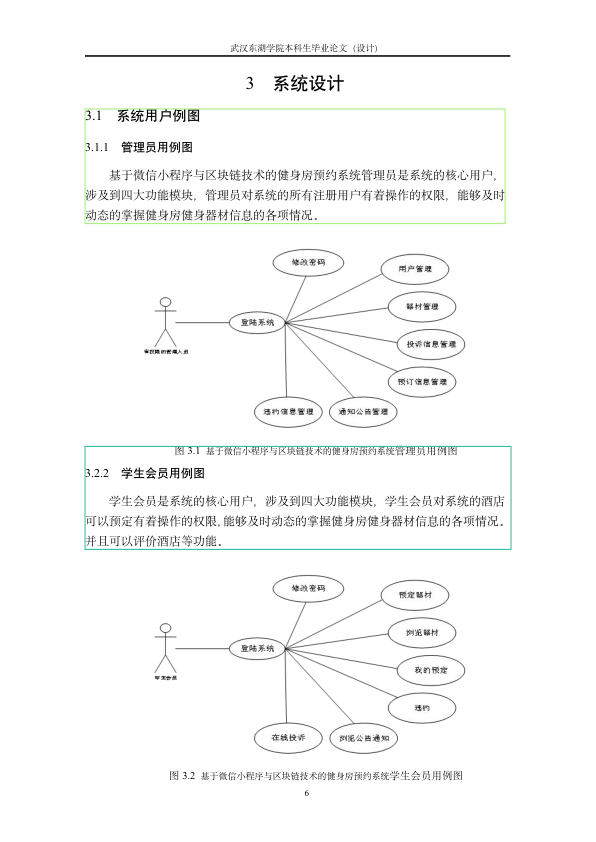

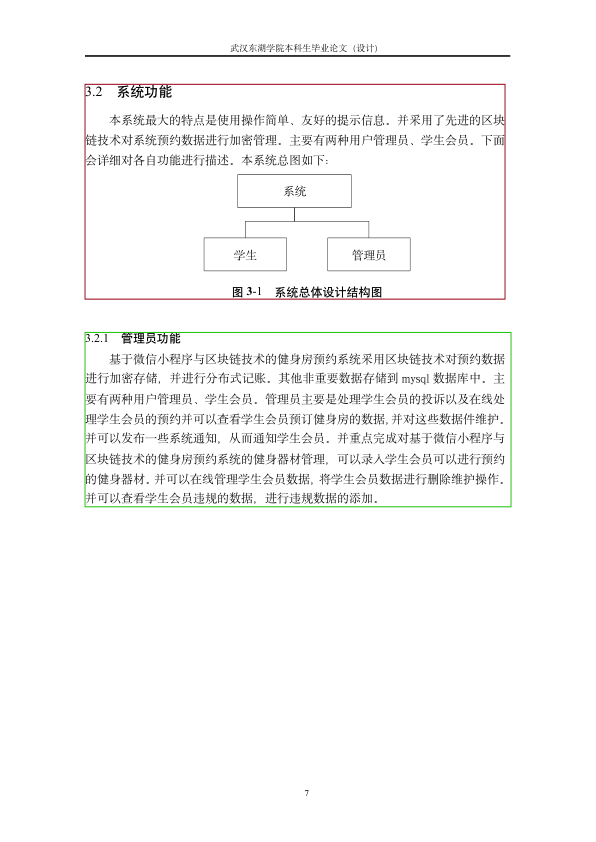

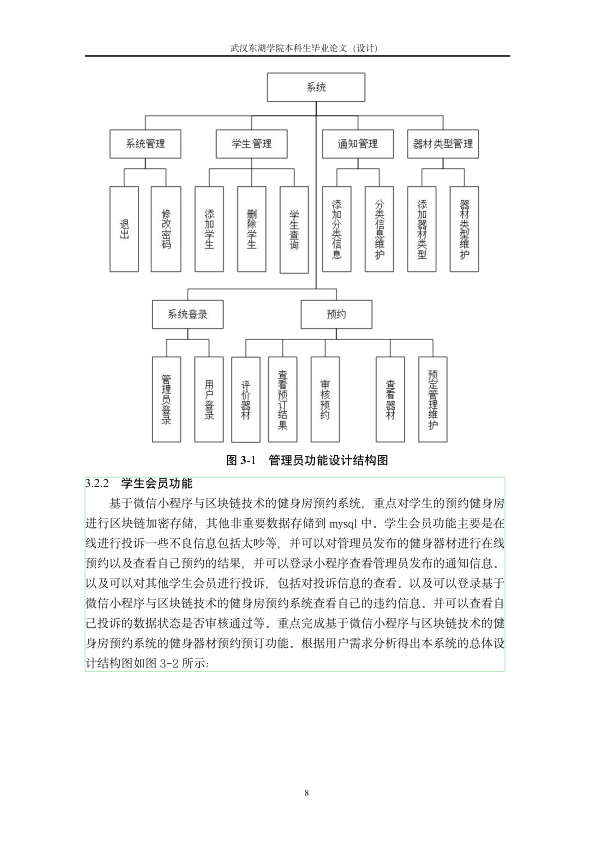

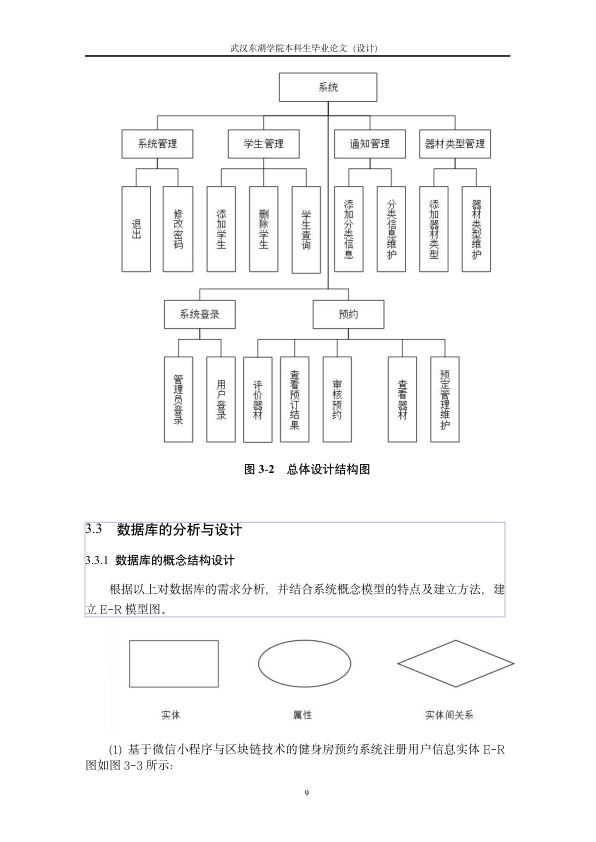

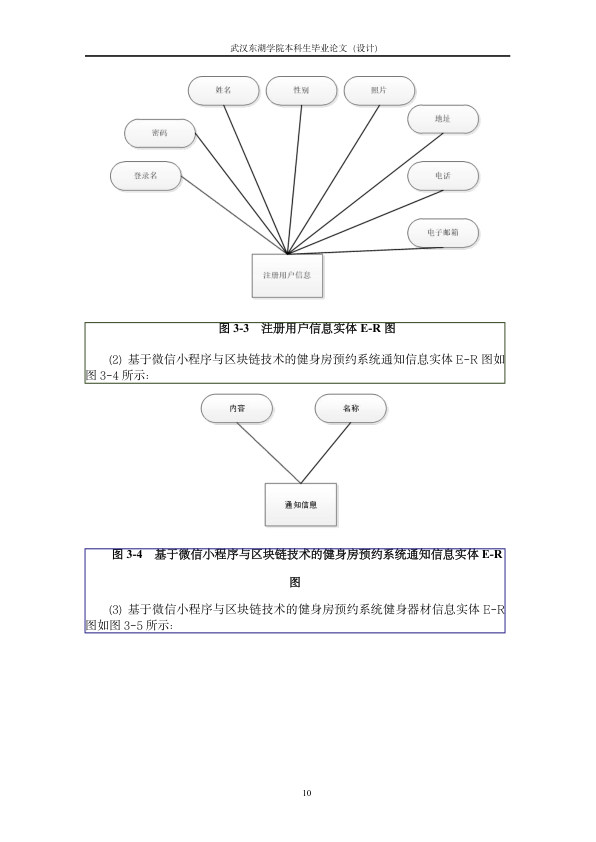

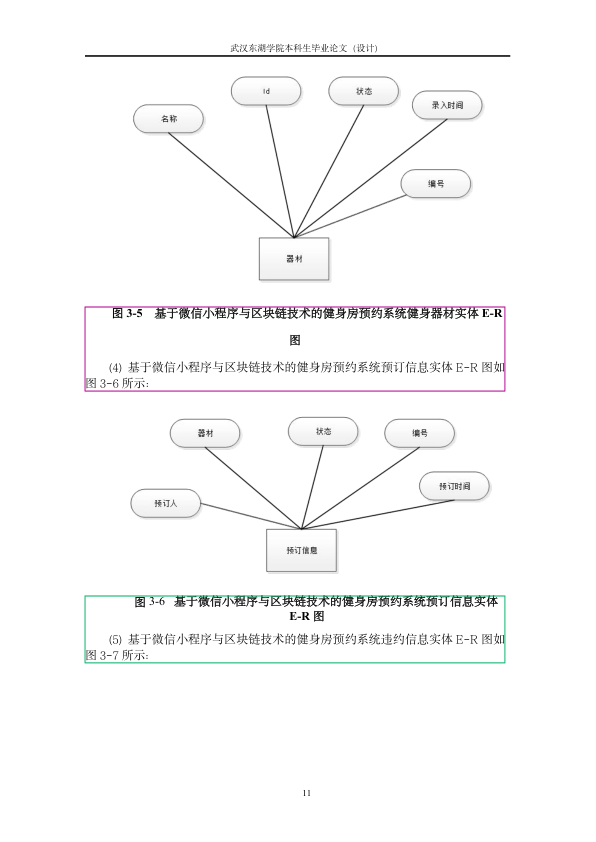

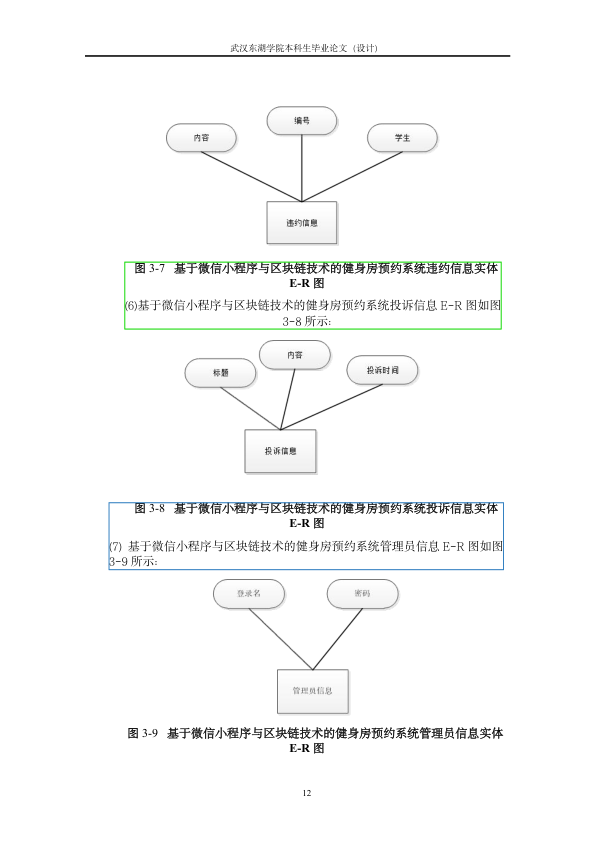

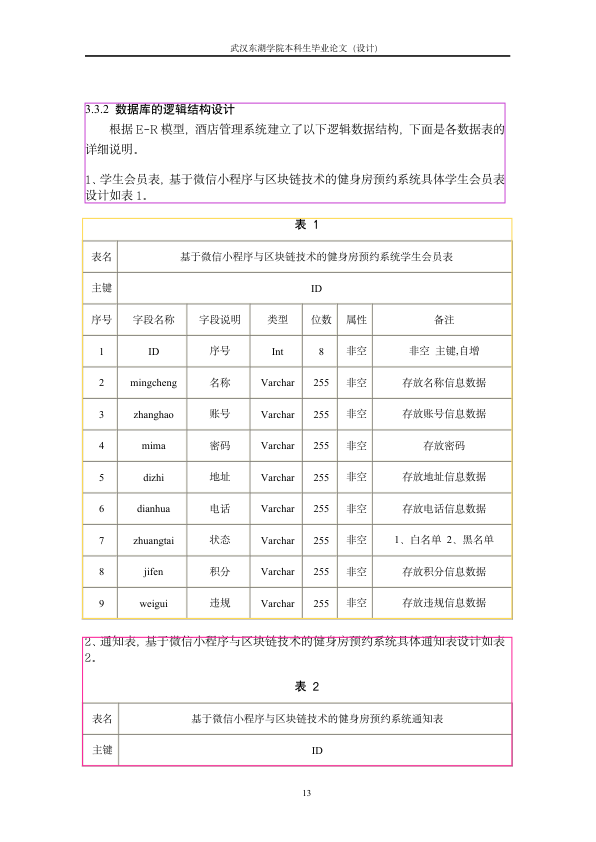

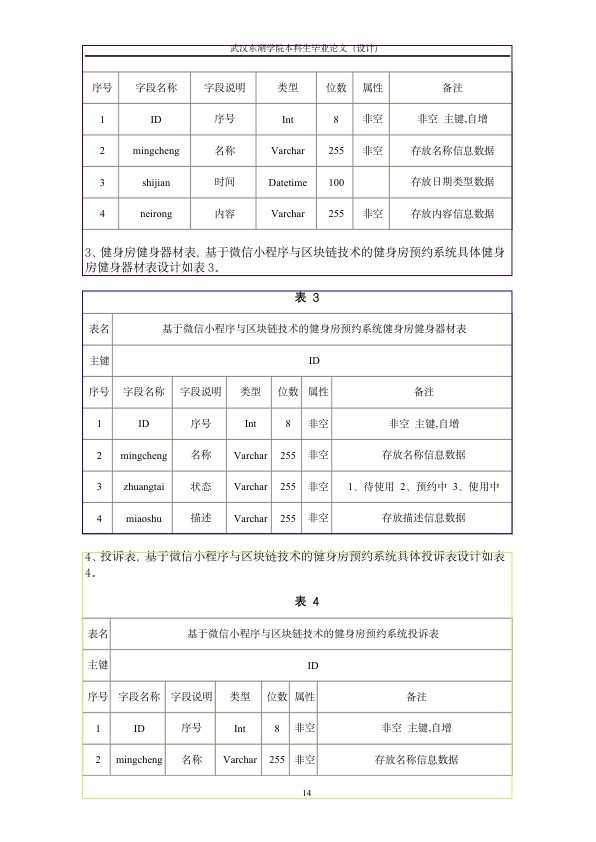

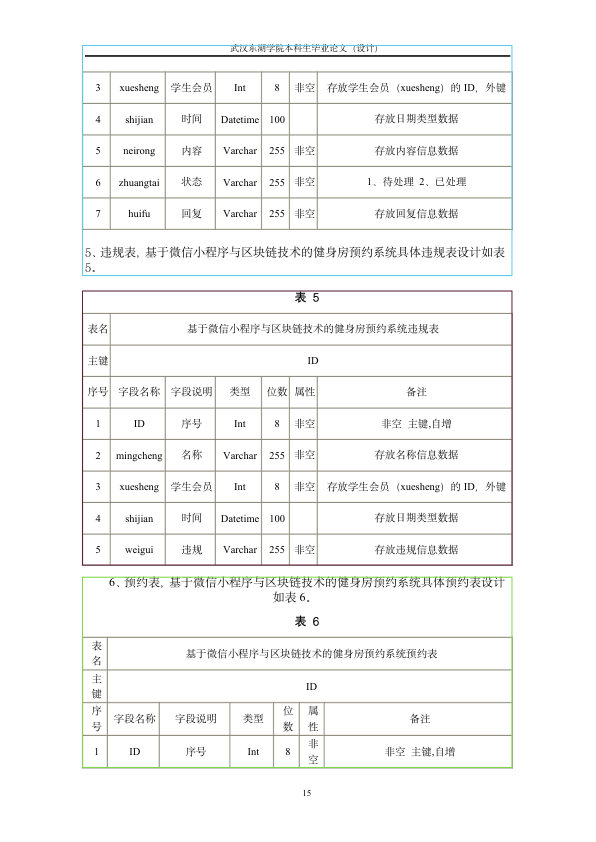

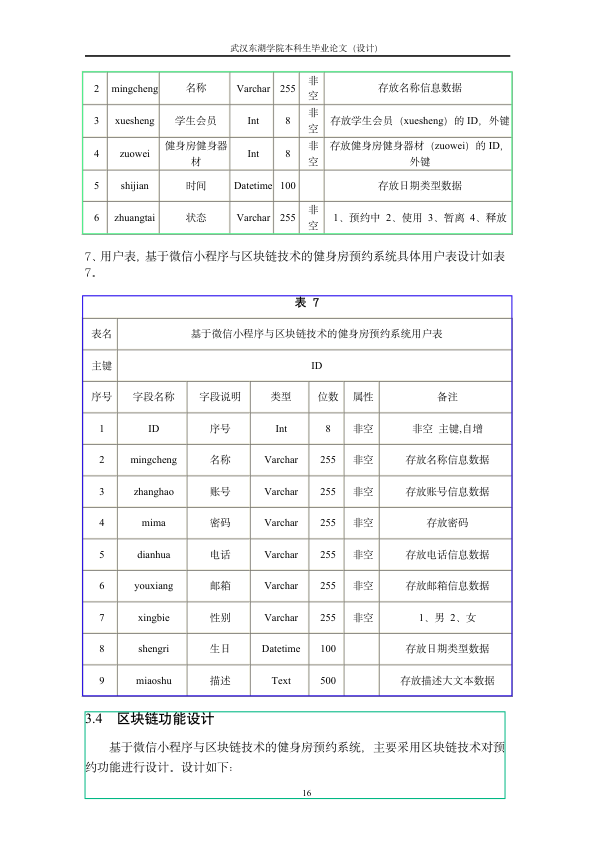

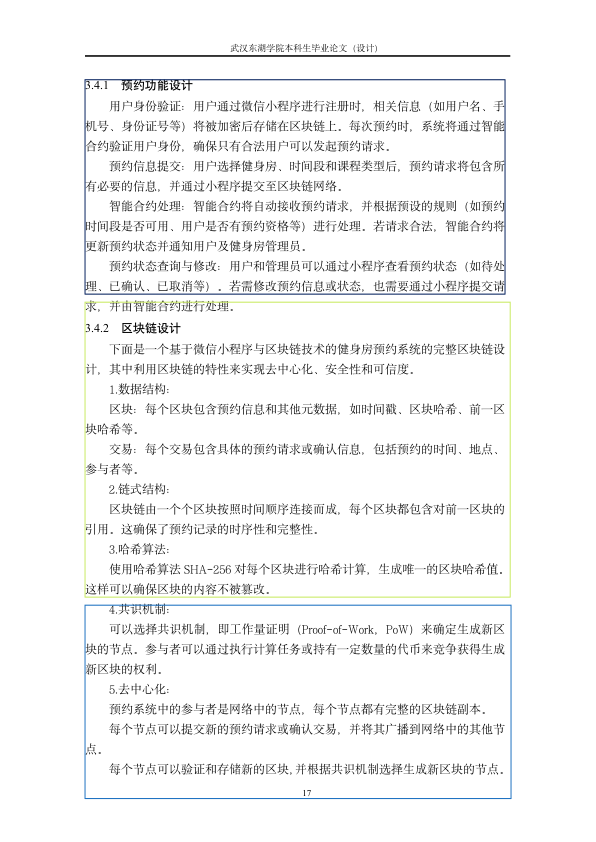

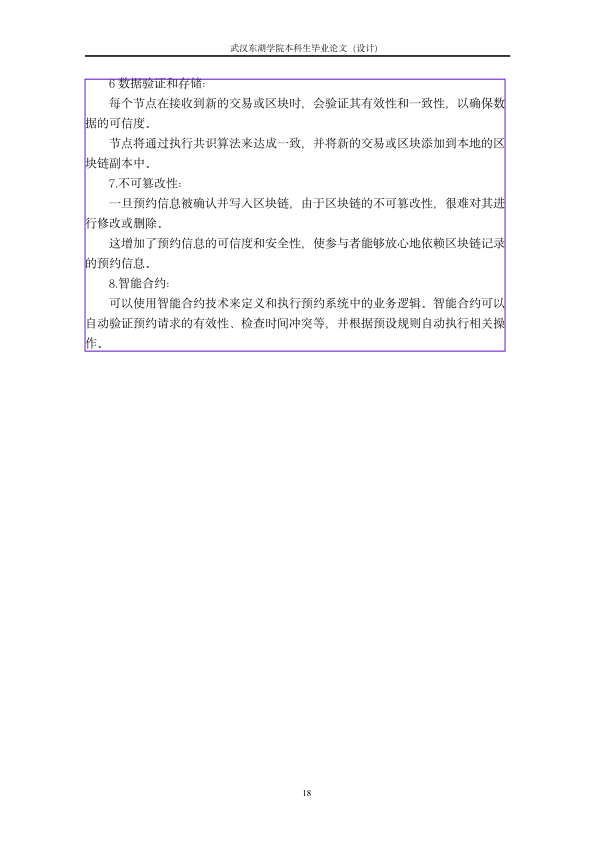

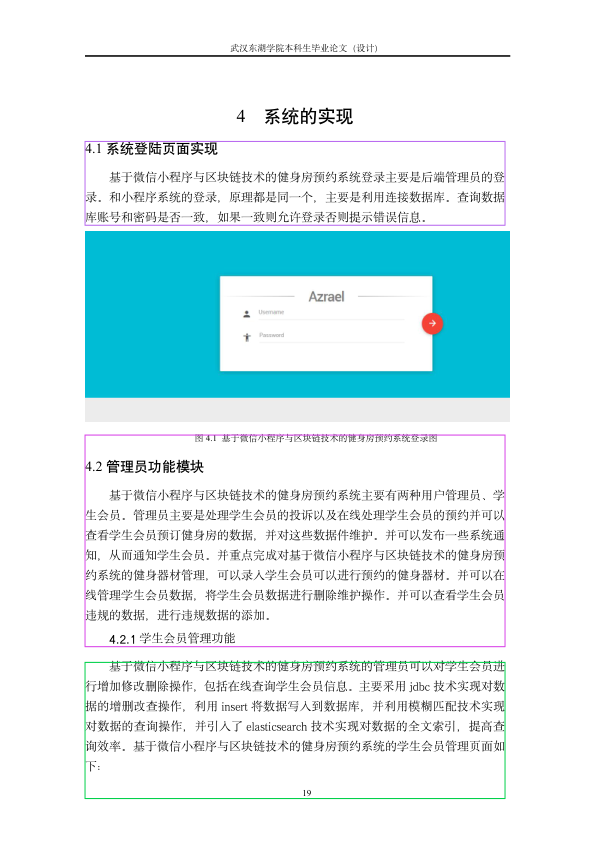

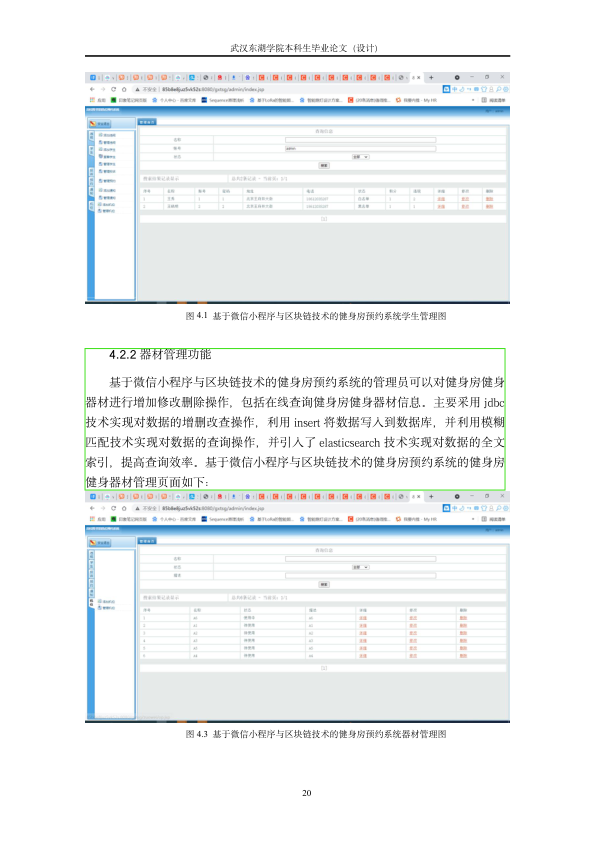

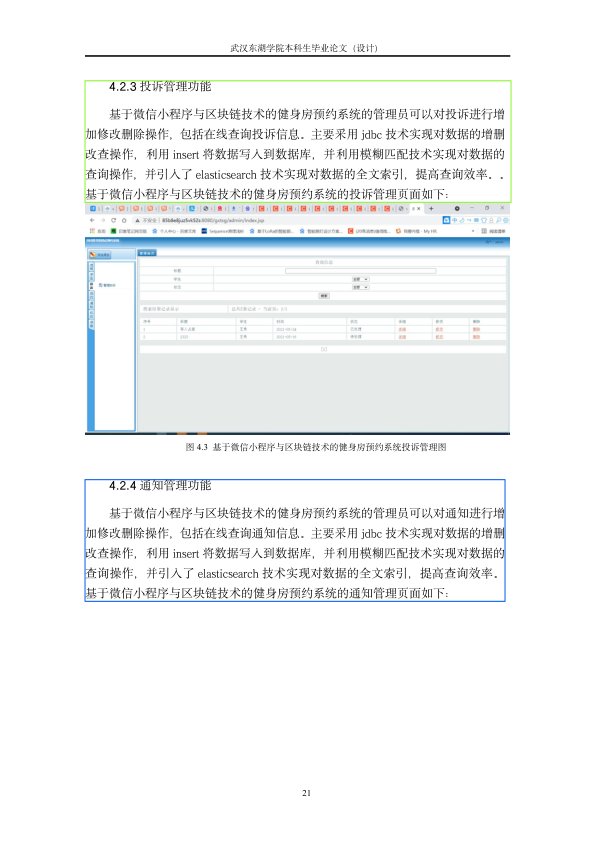

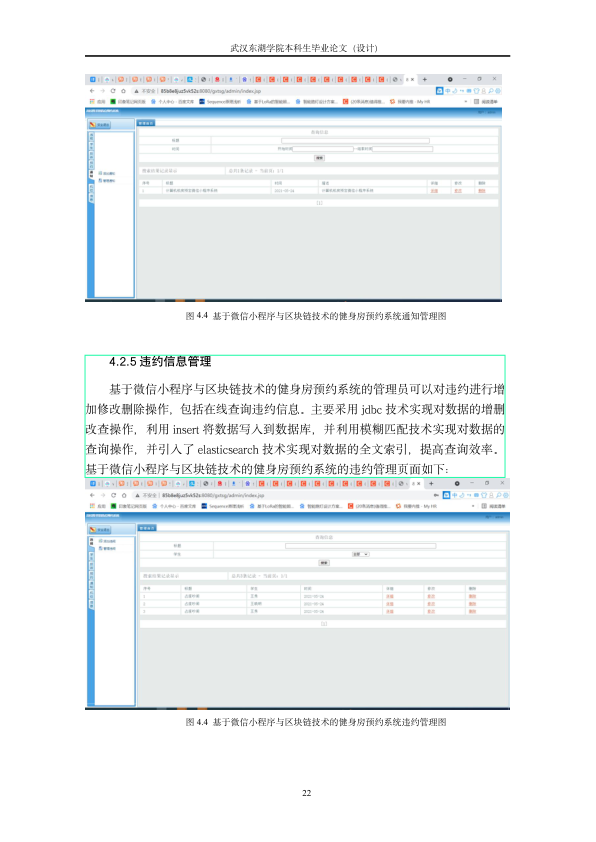

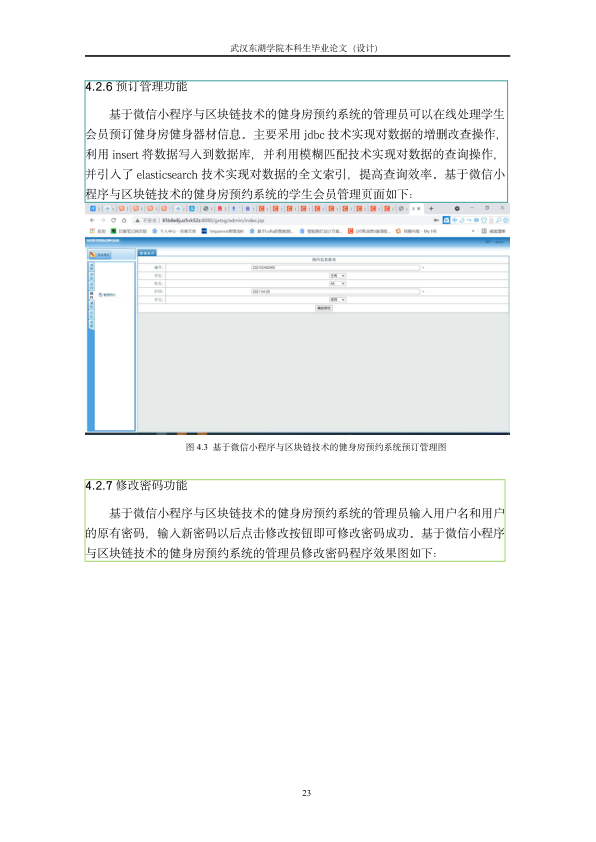

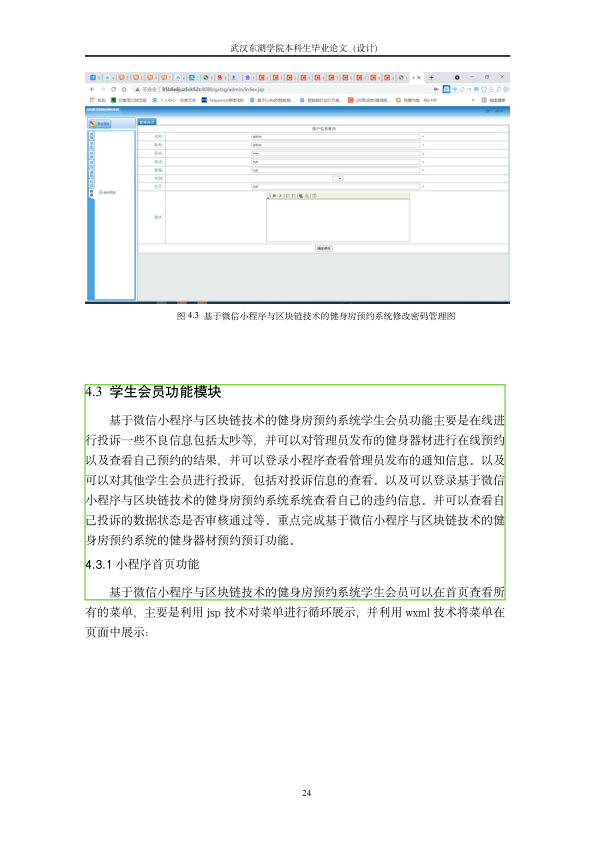

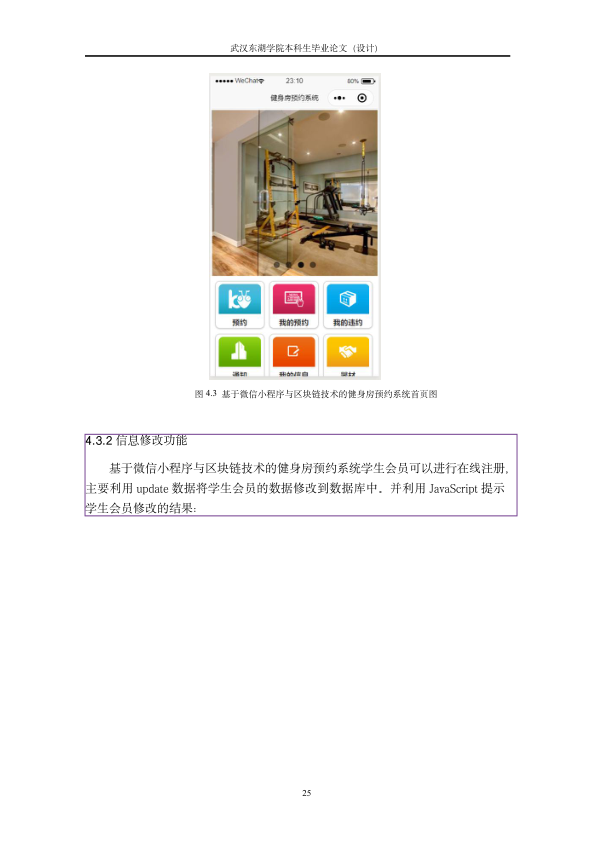

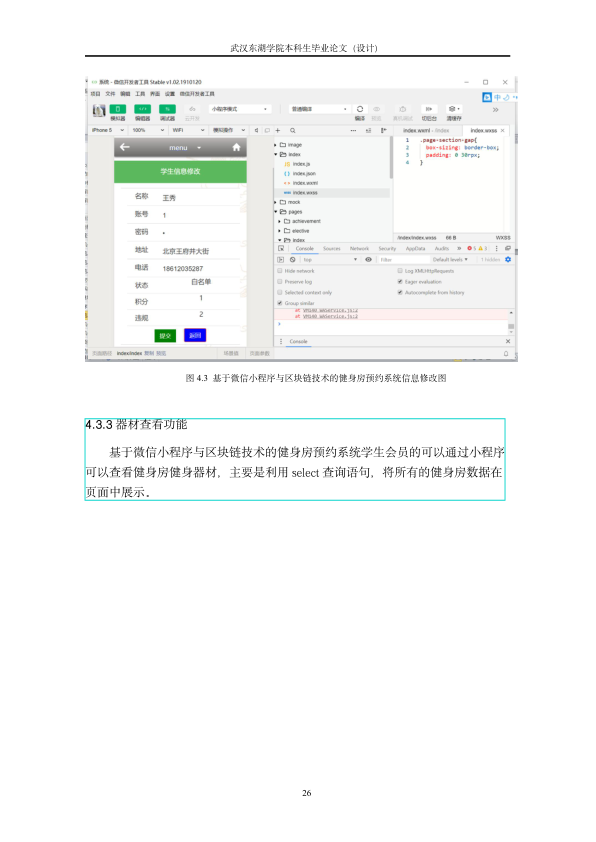

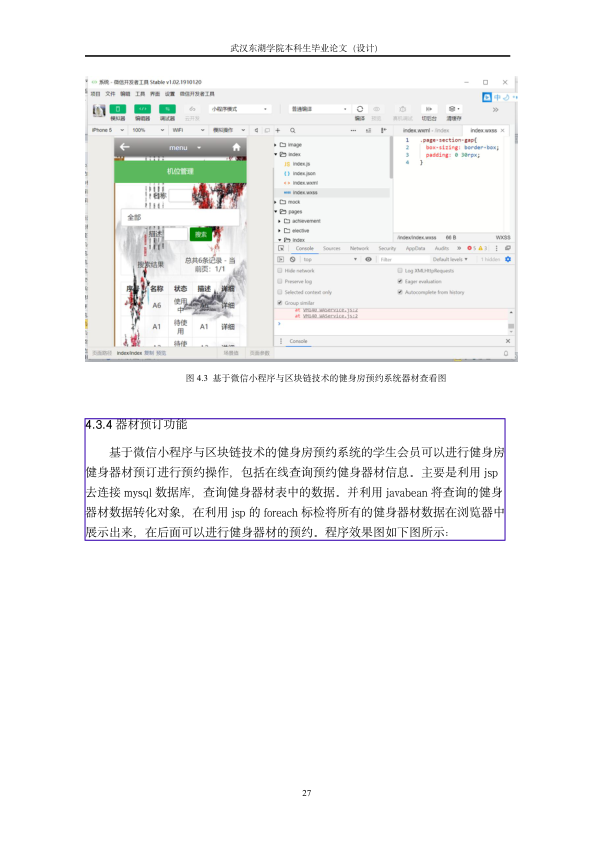

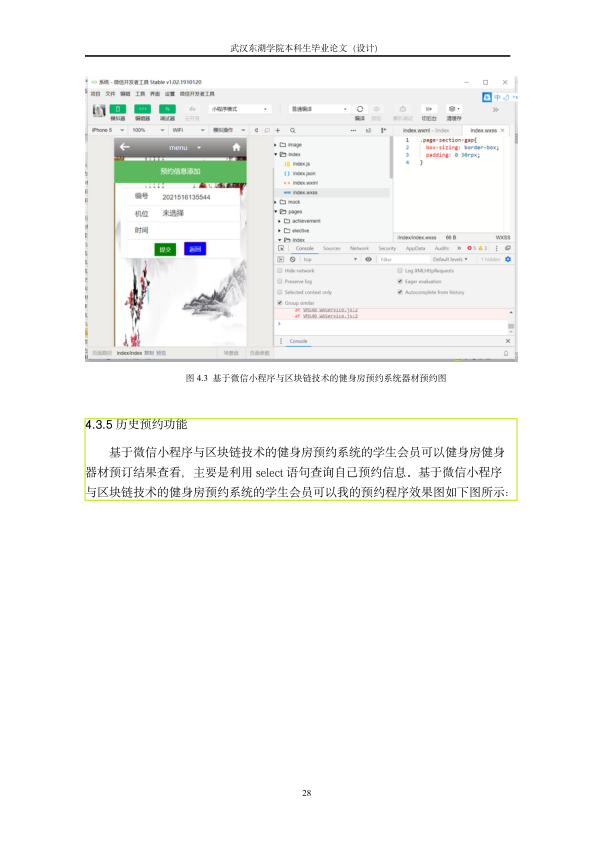

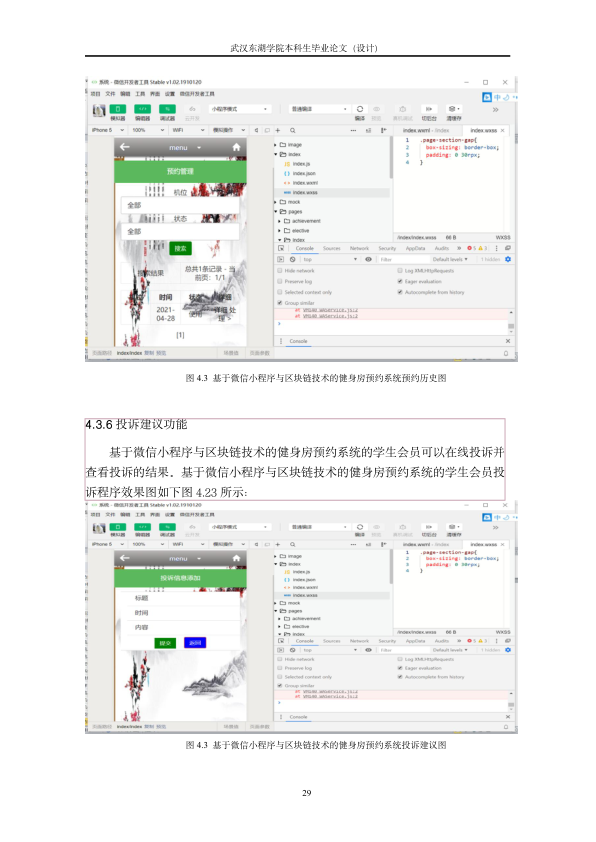

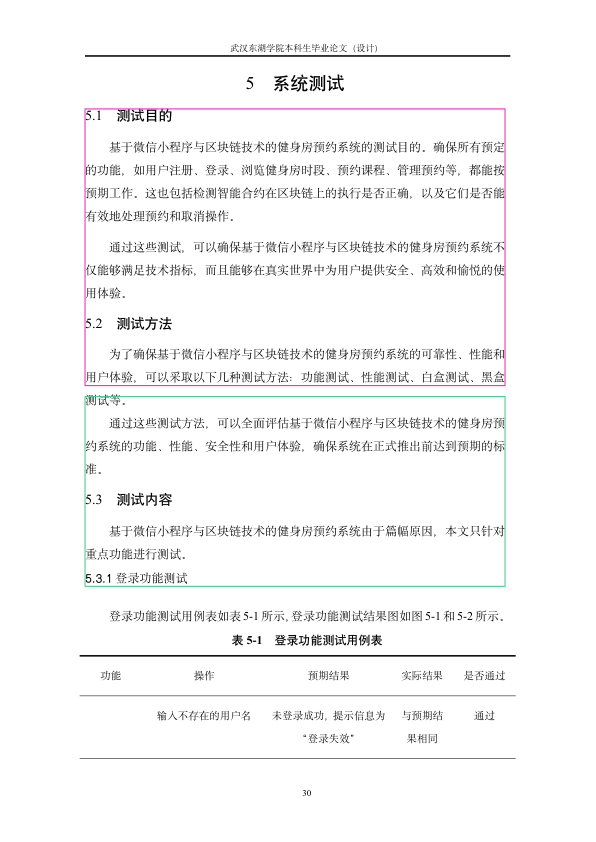

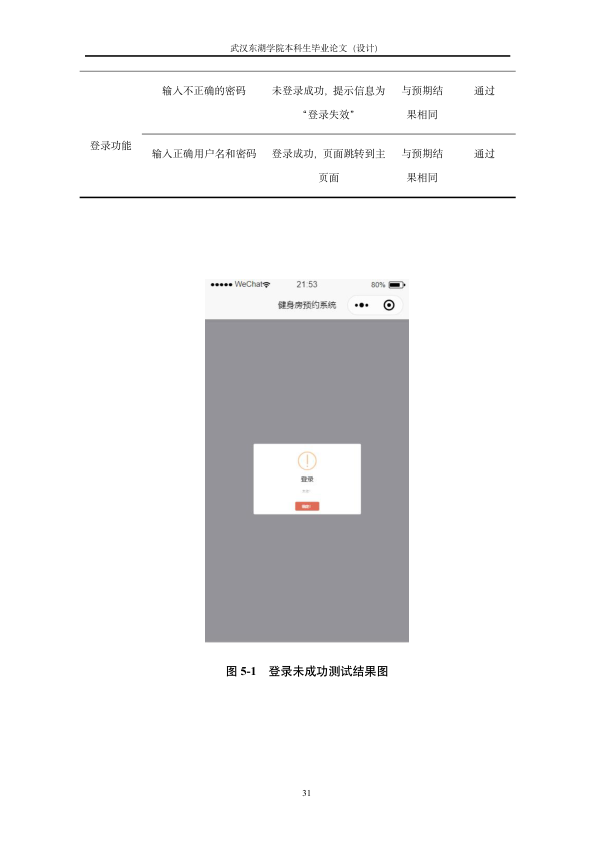

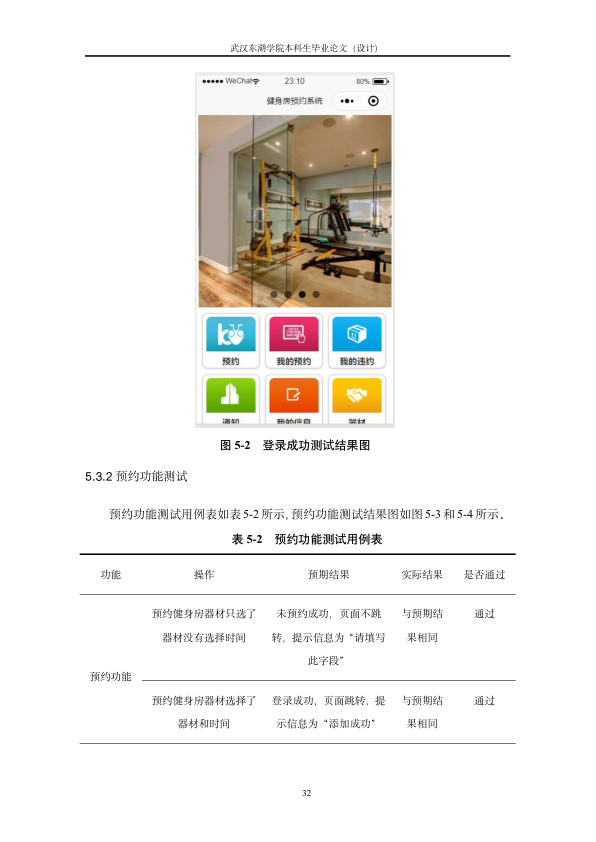

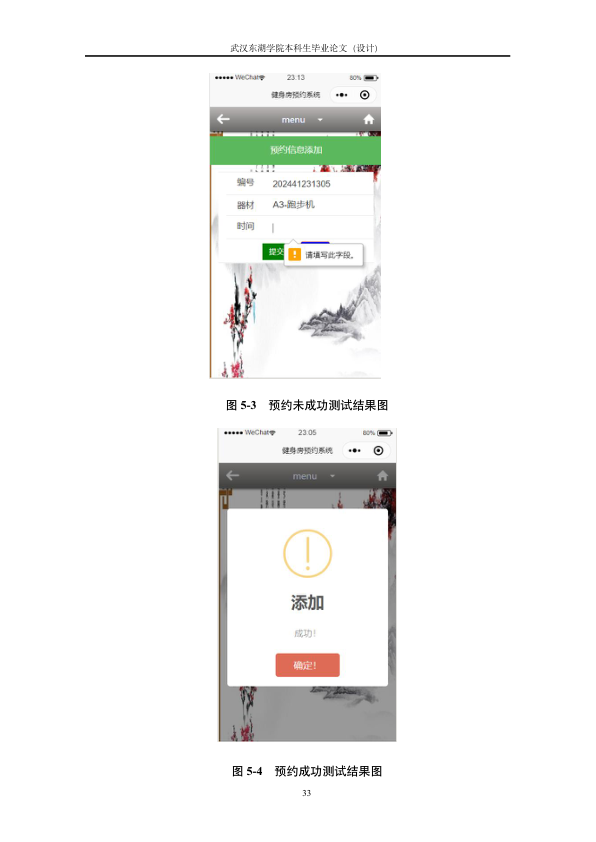

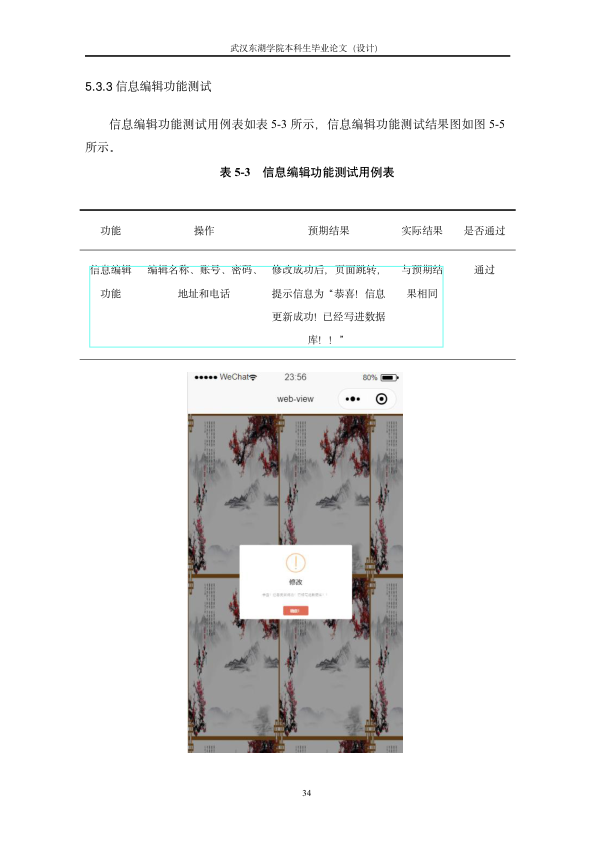

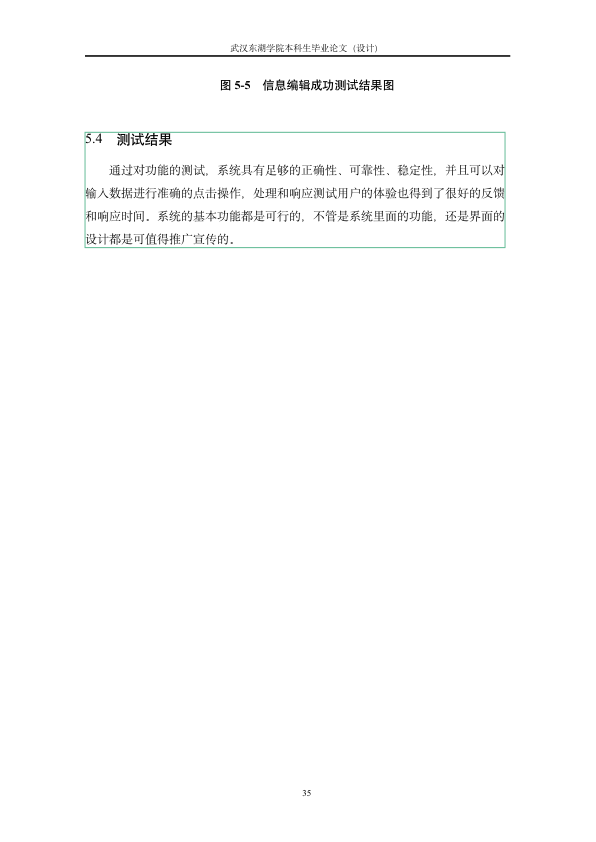

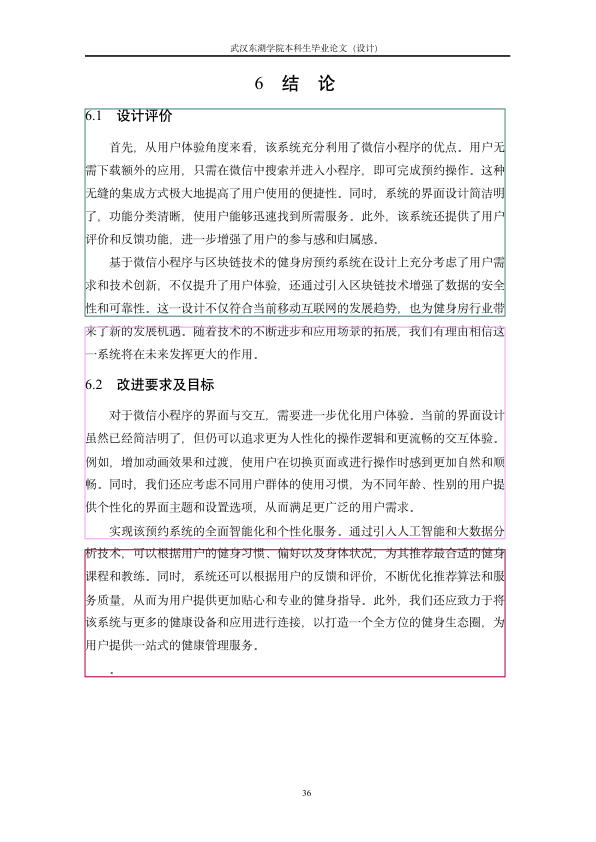

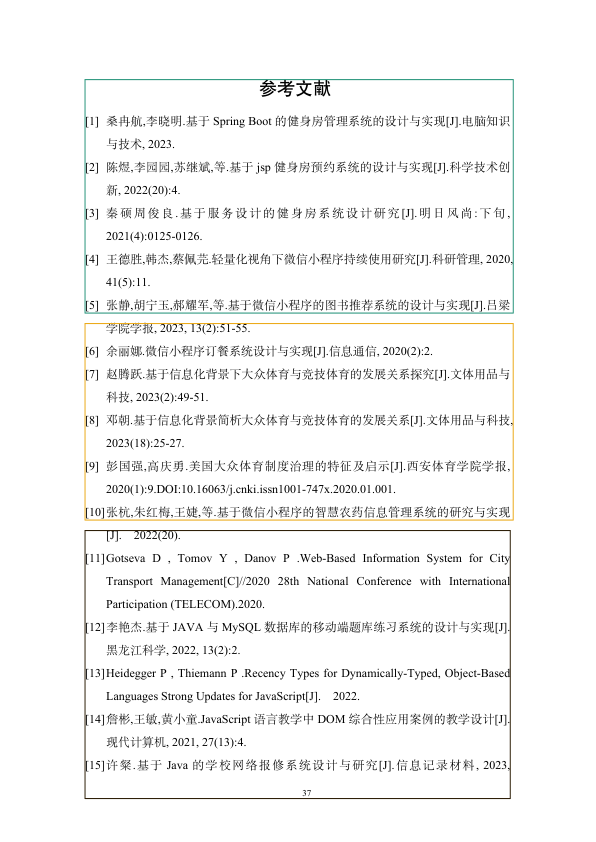

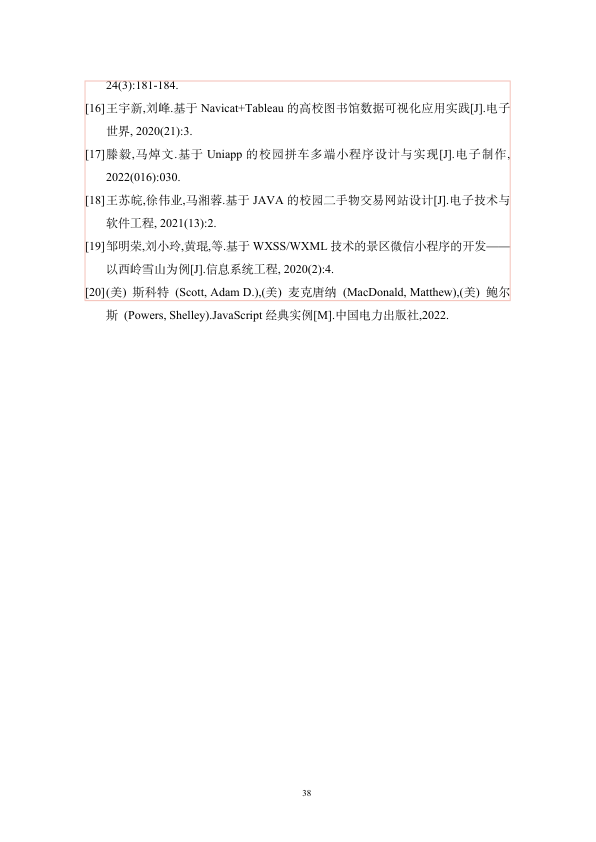

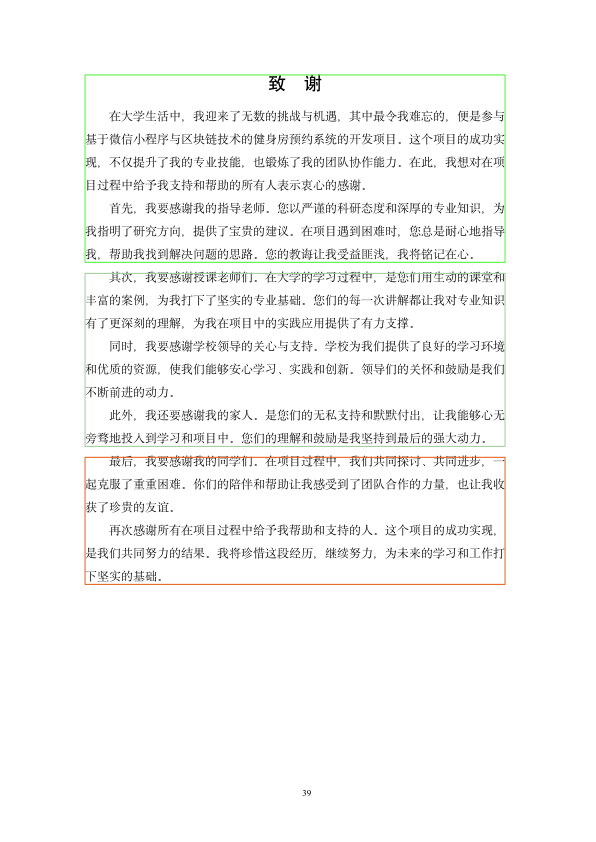

In [5]:
pdf = Pdf(pdf_path)
pdf.display_with_bboxes(
    parsed_pdf.nodes,
)